In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib import figure


In [3]:
df = pd.read_csv('Spending_Revenue_cleaned.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,Fiscal Year,Revenue or Spending,Related Govt Units,Organization Group,Department,Program,Character,Object,Sub-object,Fund,Fund Category,Amount
0,1999,Revenue,No,Public Protection,CRT Superior Court,Trial Court Services,Charges For Services,General Government Services,Court Fees,General Fund,Operating,525632.62
1,1999,Spending,No,Public Protection,PDR Public Defender,Criminal And Special Defense,Non Personnel Services,Training,Training Costs Paid To Emplye,General Fund,Operating,425.83
2,1999,Spending,No,"Public Works, Transportation & Commerce",WTR Water Enterprise,Water Facilities Maintenance Projects,Salaries,Permanent Salaries-Misc,Misc-Other Timeoff,Water Operating Fund,Continuing Projects,17433.51
3,1999,Spending,No,General Administration & Finance,ADM Gen Svcs Agency-City Admin,Ag Wts & Measures Inspection,Non Personnel Services,Employee Expenses,Local Field Exp,General Fund,Work Orders/Overhead,24.00
4,1999,Spending,No,"Public Works, Transportation & Commerce",DPW GSA - Public Works,Engineering,Mandatory Fringe Benefits,Unemployment Insurance,Unemployment Insurance,General Fund,Continuing Projects,380.15


In [4]:
spending = df[df['Revenue or Spending'] == 'Spending']

In [5]:
public_protection_spending = spending[spending['Organization Group'] == 'Public Protection']

In [6]:
police_spending = public_protection_spending[public_protection_spending['Department'] == 'POL Police']

In [6]:
police_spending.groupby(['Program', 'Fiscal Year'])['Amount'].sum()['SFPD Training']

Fiscal Year
1999     854337.17
2000     747633.43
2001    1401934.46
2002    1203402.12
2003     344446.74
2004     439084.72
2005     102472.86
2006     980575.17
2007     324477.62
2008     365406.16
2009     -15118.71
2010     193213.90
2011     257467.83
2012     414160.01
2013     404416.22
2014     480829.74
2015     391217.96
2016    1373573.29
2017     124606.94
Name: Amount, dtype: float64

In [7]:
police_spending.Program.value_counts()

Operations And Administration               2718
Investigations                              2306
Patrol                                      2290
Office Of Citizen Complaints                 917
Work Order Services                          473
Airport Police                               469
Crime Control                                248
SFPD Training                                241
Police Operations                            224
Special Operations                           208
SFPD-Recruitment And Examination Program     189
Senior Escort Service                        185
Fingerprint                                  110
911/Communications                            88
Narcotics Forfeiture                          76
Vehicle Theft Abatement                       65
Taxi Enforcement                              55
SFPD-Crime Photo Labs-Cri                     51
Police Services                               47
No Program Defined                            45
Capital Programs & C

In [8]:
police_spending_categories = police_spending.groupby(['Program'])['Amount'].agg('sum')

In [9]:
police_spending_categories.nlargest(5)

Program
Patrol                           4.238609e+09
Operations And Administration    1.186087e+09
Investigations                   1.130868e+09
Airport Police                   6.566977e+08
Crime Control                    1.767910e+08
Name: Amount, dtype: float64

In [12]:
police_spending_chars_by_year = police_spending.groupby(['Character', 'Fiscal Year'])['Amount'].sum()

In [13]:
police_spending_by_year = police_spending.groupby(['Fiscal Year'])['Amount'].sum()

In [31]:
display(police_spending_chars_by_year["Salaries"])

Fiscal Year
1999    1.862431e+08
2000    1.971553e+08
2001    2.105089e+08
2002    2.221937e+08
2003    2.486756e+08
2004    2.415430e+08
2005    2.531271e+08
2006    2.719922e+08
2007    2.894770e+08
2008    3.210427e+08
2009    3.362840e+08
2010    3.314663e+08
2011    3.299503e+08
2012    3.430932e+08
2013    3.605463e+08
2014    3.550406e+08
2015    3.545805e+08
2016    3.801219e+08
2017    3.937097e+08
Name: Amount, dtype: float64

In [32]:
patrol_budget = police_spending[police_spending["Program"] == 'Patrol']

In [33]:
patrol_budget_chars = patrol_budget.groupby(['Character'])['Amount'].sum() 

In [34]:
patrol_budget_chars.nlargest(5)

Character
Salaries                     3.207815e+09
Mandatory Fringe Benefits    6.674038e+08
Services Of Other Depts      2.768958e+08
Non Personnel Services       7.596486e+07
Operating Transfers Out      2.811904e+07
Name: Amount, dtype: float64

In [35]:
largest_cars = patrol_budget_chars.nlargest(5).index.tolist()

In [36]:
#lets try and graph how the charachters have changed over time

In [37]:
police_budget_largest_cars = patrol_budget[patrol_budget['Character'].isin(largest_cars)]

In [38]:
police_budget_largest_cars

,Fiscal Year,Revenue or Spending,Related Govt Units,Organization Group,Department,Program,Character,Object,Sub-object,Fund,Fund Category,Amount
512,1999,Spending,No,Public Protection,POL Police,Patrol,Mandatory Fringe Benefits,Social Security,Social Sec-Medicare(HI Only),Public Protection Fund,Grants,1.422940e+03
575,1999,Spending,No,Public Protection,POL Police,Patrol,Non Personnel Services,Profess & Specialized Svcs,Other Professional Services,General Fund,Operating,5.208000e+02
820,1999,Spending,No,Public Protection,POL Police,Patrol,Non Personnel Services,Training,Training Costs Paid To Emplye,Public Protection Fund,Continuing Projects,7.830000e+02
893,1999,Spending,No,Public Protection,POL Police,Patrol,Mandatory Fringe Benefits,Social Security,Social Security (Oasdi & Hi),Public Protection Fund,Continuing Projects,5.844800e+02
3529,1999,Spending,No,Public Protection,POL Police,Patrol,Salaries,Permanent Salaries-Misc,Misc-Disability Pay,General Fund,Operating,2.885684e+06
...,...,...,...,...,...,...,...,...,...,...,...,...
516603,2017,Spending,No,Public Protection,POL Police,Patrol,Mandatory Fringe Benefits,Retirement,Retire City Uniform(POL & FIR),General Fund,Operating,3.221879e+07
516683,2017,Spending,No,Public Protection,POL Police,Patrol,Mandatory Fringe Benefits,Unemployment Insurance,Unemployment Insurance,General Fund,Annual Projects,6.932000e+02
517065,2017,Spending,No,Public Protection,POL Police,Patrol,Salaries,Permanent Salaries-Misc,Perm Salaries-Misc-Regular,General Fund,Operating,1.544654e+08
517353,2017,Spending,No,Public Protection,POL Police,Patrol,Mandatory Fringe Benefits,Social Security,Social Sec-Medicare(HI Only),General Fund,Operating,3.079192e+06


In [39]:
cats_over_year = police_budget_largest_cars.groupby(['Fiscal Year','Character'])['Amount'].sum()

In [40]:
cats_over_year

Fiscal Year  Character                
1999         Mandatory Fringe Benefits    1.435289e+07
             Non Personnel Services       1.347470e+06
             Operating Transfers Out      1.693106e+06
             Salaries                     1.009722e+08
             Services Of Other Depts      9.462197e+06
                                              ...     
2016         Services Of Other Depts      1.869677e+07
2017         Mandatory Fringe Benefits    6.693713e+07
             Non Personnel Services       4.502752e+06
             Salaries                     2.307928e+08
             Services Of Other Depts      2.169751e+07
Name: Amount, Length: 86, dtype: float64

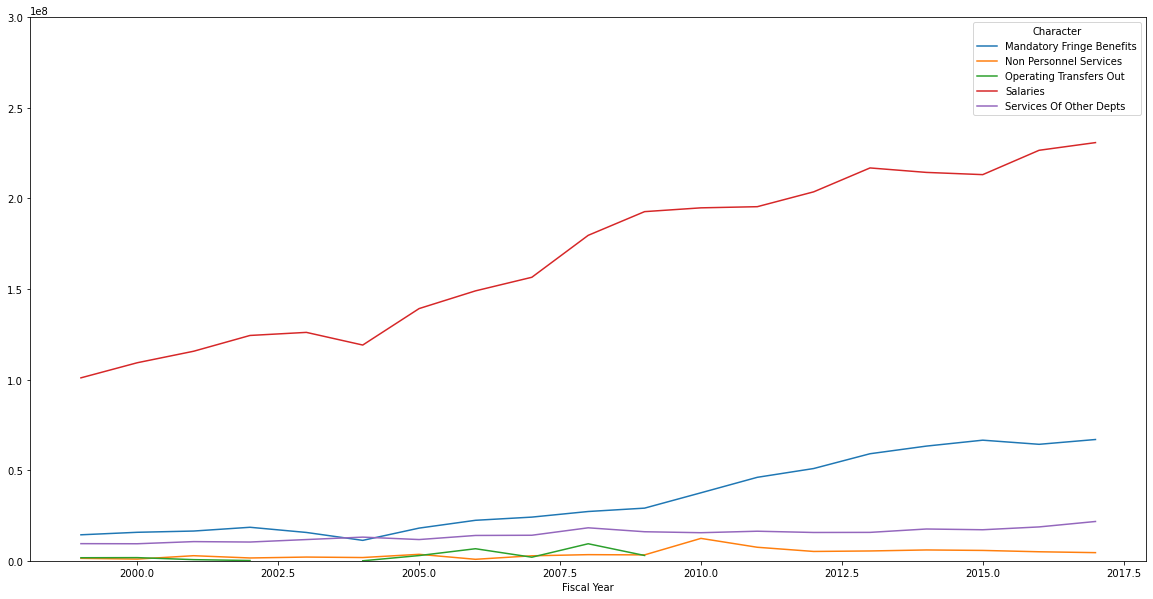

In [42]:
fig, ax = plt.subplots(figsize=(20,10))
ax.set_ylim(bottom=0)
ax.set_ylim(top=300000000)

cats_over_year.unstack().plot(ax=ax)

In [43]:
police_without_patrol = police_spending[police_spending['Program']!='Patrol']

In [44]:
police_without_patrol

,Fiscal Year,Revenue or Spending,Related Govt Units,Organization Group,Department,Program,Character,Object,Sub-object,Fund,Fund Category,Amount
93,1999,Spending,No,Public Protection,POL Police,Senior Escort Service,Mandatory Fringe Benefits,Social Security,Social Sec-Medicare(HI Only),General Fund,Operating,10958.13
94,1999,Spending,No,Public Protection,POL Police,Operations And Administration,Materials & Supplies,Other Materials & Supplies,Forms,General Fund,Operating,43255.58
106,1999,Spending,No,Public Protection,POL Police,Operations And Administration,Materials & Supplies,Building & Constructn Supplies,Small Tools And Intruments,General Fund,Operating,991.21
186,1999,Spending,No,Public Protection,POL Police,911/Communications,Salaries,Premium Pay,Premium Pay - Misc,General Fund,Operating,293054.99
197,1999,Spending,No,Public Protection,POL Police,SFPD Training,Non Personnel Services,Rent&Lease-Building&Structure,Property Rent,Public Protection Fund,Continuing Projects,23380.10
...,...,...,...,...,...,...,...,...,...,...,...,...
518854,2017,Spending,No,Public Protection,POL Police,Operations And Administration,Non Personnel Services,Profess & Specialized Svcs,Other Medical Services,General Fund,Operating,174743.79
518968,2017,Spending,No,Public Protection,POL Police,Investigations,Non Personnel Services,Training,Training Costs Paid To Emplye,Public Protection Fund,Continuing Projects,36358.45
518972,2017,Spending,No,Public Protection,POL Police,Investigations,Mandatory Fringe Benefits,Other Fringe Benefits,Long Term Disability Insurance,Public Protection Fund,Continuing Projects,767.82
519034,2017,Spending,No,Public Protection,POL Police,Operations And Administration,Salaries,Premium Pay,Premium Pay - Misc,General Fund,Continuing Projects,980.00


In [45]:
police_char_trends = police_without_patrol.groupby(['Fiscal Year','Character'])['Amount'].sum()

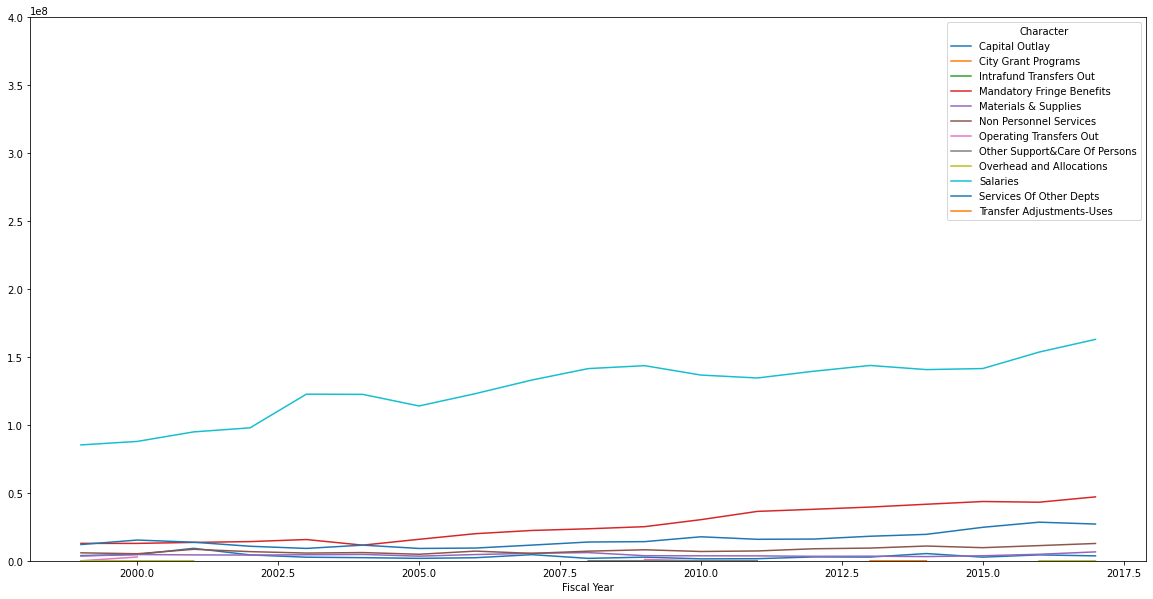

In [46]:
fig, ax = plt.subplots(figsize=(20,10))
ax.set_ylim(bottom=0)
ax.set_ylim(top=400000000)

police_char_trends.unstack().plot(ax=ax)

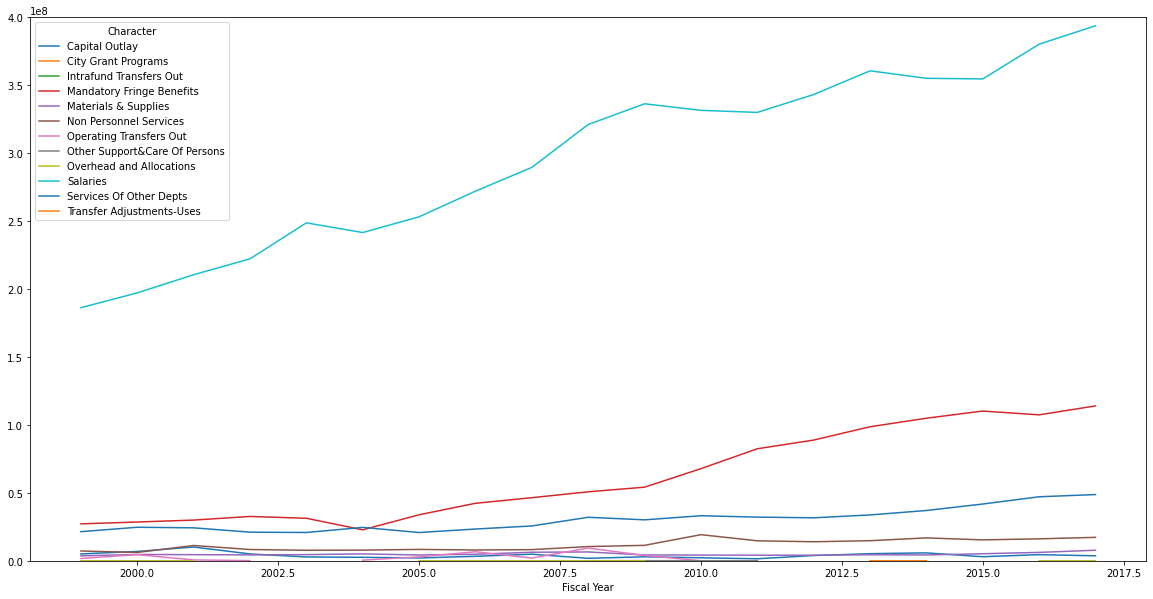

In [47]:
police_with_patrol = police_spending.groupby(['Fiscal Year','Character'])['Amount'].sum()

fig, ax = plt.subplots(figsize=(20,10))
ax.set_ylim(bottom=0)
ax.set_ylim(top=400000000)

police_with_patrol.unstack().plot(ax=ax)

In [48]:
#patrol slaries accoutn for 3/4s of the over police salary increase

In [49]:
officer_training = police_spending[police_spending['Program']=='SFPD Training']

In [50]:
officer_training

,Fiscal Year,Revenue or Spending,Related Govt Units,Organization Group,Department,Program,Character,Object,Sub-object,Fund,Fund Category,Amount
197,1999,Spending,No,Public Protection,POL Police,SFPD Training,Non Personnel Services,Rent&Lease-Building&Structure,Property Rent,Public Protection Fund,Continuing Projects,23380.10
348,1999,Spending,No,Public Protection,POL Police,SFPD Training,Services Of Other Depts,Svcs Of Other Depts -AAO Funds,Sr-DPW-Building Repair,Public Protection Fund,Continuing Projects,12105.73
396,1999,Spending,No,Public Protection,POL Police,SFPD Training,Mandatory Fringe Benefits,Retirement,Retirement Pick Up,Public Protection Fund,Continuing Projects,6.90
1880,1999,Spending,No,Public Protection,POL Police,SFPD Training,Mandatory Fringe Benefits,Social Security,Social Sec-Medicare(HI Only),Public Protection Fund,Continuing Projects,3805.40
6177,1999,Spending,No,Public Protection,POL Police,SFPD Training,Mandatory Fringe Benefits,Health Service,Dependent Coverage,Public Protection Fund,Continuing Projects,2.97
...,...,...,...,...,...,...,...,...,...,...,...,...
487940,2016,Spending,No,Public Protection,POL Police,SFPD Training,Non Personnel Services,Travel,Air Travel - Employees,Public Protection Fund,Continuing Projects,4753.55
488440,2016,Spending,No,Public Protection,POL Police,SFPD Training,Non Personnel Services,Employee Expenses,Auto Mileage,Public Protection Fund,Continuing Projects,187.20
488675,2017,Spending,No,Public Protection,POL Police,SFPD Training,Non Personnel Services,Training,Training Costs Paid To Vendors,Public Protection Fund,Continuing Projects,-19609.37
500471,2017,Spending,No,Public Protection,POL Police,SFPD Training,Non Personnel Services,Training,Training Costs Paid To Emplye,Public Protection Fund,Continuing Projects,140658.89


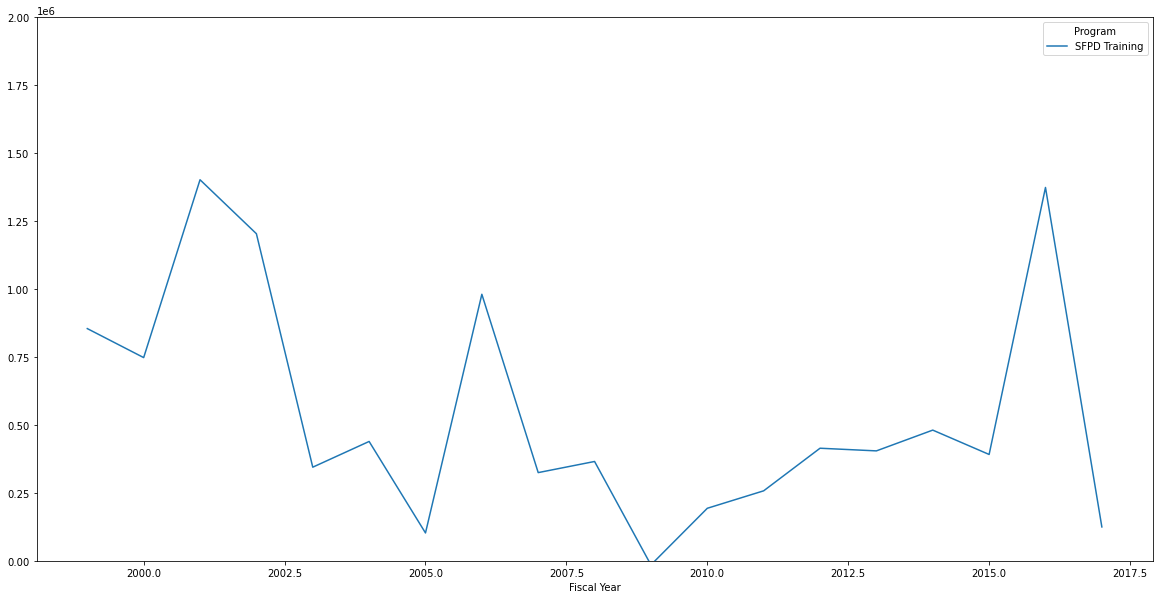

In [51]:
training = officer_training.groupby(['Fiscal Year','Program'])['Amount'].sum()

fig, ax = plt.subplots(figsize=(20,10))
ax.set_ylim(bottom=0)
ax.set_ylim(top=2000000)

training.unstack().plot(ax=ax)

In [54]:
training.max()

1401934.46

In [55]:
training.min()

-15118.709999999963

In [56]:
training

Fiscal Year  Program      
1999         SFPD Training     854337.17
2000         SFPD Training     747633.43
2001         SFPD Training    1401934.46
2002         SFPD Training    1203402.12
2003         SFPD Training     344446.74
2004         SFPD Training     439084.72
2005         SFPD Training     102472.86
2006         SFPD Training     980575.17
2007         SFPD Training     324477.62
2008         SFPD Training     365406.16
2009         SFPD Training     -15118.71
2010         SFPD Training     193213.90
2011         SFPD Training     257467.83
2012         SFPD Training     414160.01
2013         SFPD Training     404416.22
2014         SFPD Training     480829.74
2015         SFPD Training     391217.96
2016         SFPD Training    1373573.29
2017         SFPD Training     124606.94
Name: Amount, dtype: float64

In [ ]:
#not sure what that negative value 

In [8]:
police_spending_chars_by_year = police_spending.groupby(['Character', 'Fiscal Year'])['Amount'].sum()

In [9]:
police_spending_chars_by_year["Salaries"]

Fiscal Year
1999    1.862431e+08
2000    1.971553e+08
2001    2.105089e+08
2002    2.221937e+08
2003    2.486756e+08
2004    2.415430e+08
2005    2.531271e+08
2006    2.719922e+08
2007    2.894770e+08
2008    3.210427e+08
2009    3.362840e+08
2010    3.314663e+08
2011    3.299503e+08
2012    3.430932e+08
2013    3.605463e+08
2014    3.550406e+08
2015    3.545805e+08
2016    3.801219e+08
2017    3.937097e+08
Name: Amount, dtype: float64

In [10]:
police_spending_by_year = police_spending.groupby(['Fiscal Year'])['Amount'].sum()

In [11]:
police_spending_by_year

Fiscal Year
1999    2.470225e+08
2000    2.651072e+08
2001    2.885341e+08
2002    2.911717e+08
2003    3.095024e+08
2004    2.932627e+08
2005    3.114642e+08
2006    3.426161e+08
2007    3.695890e+08
2008    4.087632e+08
2009    4.261468e+08
2010    4.430879e+08
2011    4.487188e+08
2012    4.696562e+08
2013    4.988547e+08
2014    5.088858e+08
2015    5.194383e+08
2016    5.502244e+08
2017    5.740110e+08
Name: Amount, dtype: float64

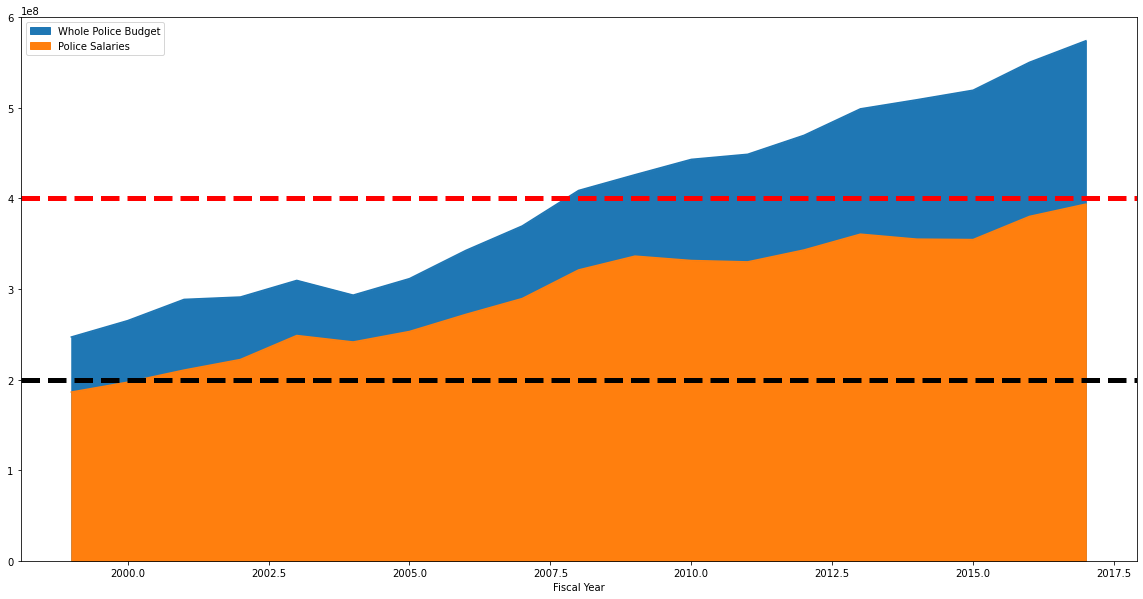

In [23]:
fig, ax = plt.subplots(figsize=(20,10))
ax.set_ylim(bottom=1000000)
ax.set_ylim(top=600000000)

police_spending_by_year.plot(ax=ax, label='Whole Police Budget', kind='area')
police_spending_chars_by_year["Salaries"].plot(ax=ax, label='Police Salaries', kind='area')
plt.axhline(200000000, color='black', linestyle='--', linewidth=5)
plt.axhline(400000000, color='red', linestyle='--', linewidth=5)
ax.legend()

In [42]:
police_spending.Character.value_counts()
#The gap between the two areas is everything else

Non Personnel Services           3069
Mandatory Fringe Benefits        2751
Salaries                         2010
Materials & Supplies             1750
Services Of Other Depts           944
Capital Outlay                    421
Transfer Adjustments-Uses          92
Operating Transfers Out            27
Overhead and Allocations           15
Other Support&Care Of Persons       7
City Grant Programs                 7
Intrafund Transfers Out             3
Name: Character, dtype: int64